# 0.0 Importing the data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1xEsjutddVtMKisrUPfPVSdKouFnv70C_'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('archive.zip')

In [ ]:
!mkdir /content/IDC_files
!unzip -q /content/archive.zip -d /content/IDC_files 

# 1.0 Preprocessing

In [ ]:
import os
import random 
from glob import glob
from pathlib import Path
DATASET_DIR = os.path.join("/content", "IDC_files","content","IDC_patients")
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")
VAL_DIR = os.path.join(DATASET_DIR, "val")

all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*png'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))

277524


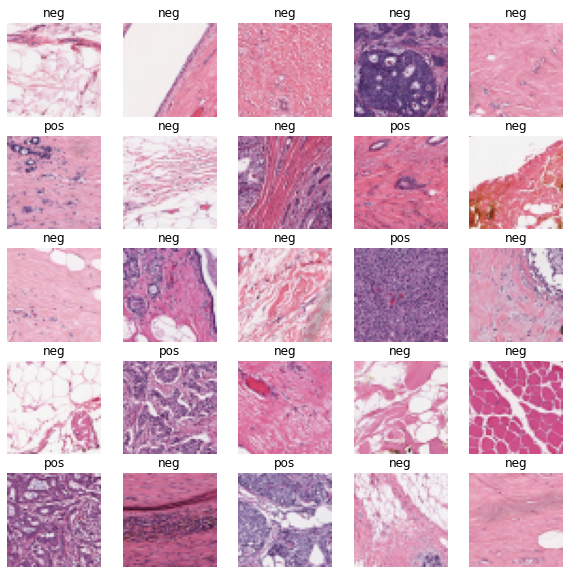

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

# Intializing Data generators

### Model 1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
HEIGHT = 50
WIDTH = 50

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen1 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
    )

# 2. Retrieve the iterator
train_generator1 = train_datagen1.flow_from_directory(TRAIN_DIR, 
                                                    classes=['neg'],
                                                    shuffle = False,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 121957 images belonging to 1 classes.


In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
val_datagen1 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
    )

# 2. Retrieve the iterator
val_generator1 = val_datagen1.flow_from_directory(VAL_DIR, 
                                                   classes=['neg'],
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 37896 images belonging to 1 classes.


In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen1 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input,
    )

# 2. Retrieve the iterator
test_generator1_pos = test_datagen1.flow_from_directory(TEST_DIR, 
                                                    classes=['pos'],
                                                    shuffle = False,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=64,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')


Found 14602 images belonging to 1 classes.


In [ ]:
test_generator1_neg = test_datagen1.flow_from_directory(TEST_DIR, 
                                                    classes=['neg'],
                                                    shuffle = False,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=64,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 38885 images belonging to 1 classes.


### Model all but 1,7

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
HEIGHT = 50
WIDTH = 50

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen_n19=  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
    )

# 2. Retrieve the iterator
train_generator_n19_pos = train_datagen_n19.flow_from_directory(TRAIN_DIR, 
                                                    classes=['pos'], 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 49174 images belonging to 1 classes.


In [ ]:
train_generator_n19_neg = train_datagen_n19.flow_from_directory(TRAIN_DIR, 
                                                    classes=['neg'], 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 121957 images belonging to 1 classes.


In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
val_datagen_n19 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
    )

# 2. Retrieve the iterator
val_generator_n19 = val_datagen_n19.flow_from_directory(VAL_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 52906 images belonging to 2 classes.


In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen_n17=  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet.preprocess_input,
    )

# 2. Retrieve the iterator
test_generator_n17_pos = test_datagen_n17.flow_from_directory(TEST_DIR, 
                                                    classes=['pos'], 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 14602 images belonging to 1 classes.


In [ ]:
test_generator_n17_neg = test_datagen_n17.flow_from_directory(TEST_DIR, 
                                                    classes=['neg'],
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 38885 images belonging to 1 classes.


### Model 7

In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen_7 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    )

# 2. Retrieve the iterator
test_generator_7_pos = test_datagen_7.flow_from_directory(TEST_DIR, 
                                                    classes=['pos'],
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 14602 images belonging to 1 classes.


In [ ]:
# 2. Retrieve the iterator
test_generator_7_neg = test_datagen_7.flow_from_directory(TEST_DIR, 
                                                    classes=['neg'],
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 38885 images belonging to 1 classes.


### Model 8

In [ ]:
# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen_8 =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.inception_v3.preprocess_input,
    )

# 2. Retrieve the iterator
test_generator_8_pos = test_datagen_8.flow_from_directory(TEST_DIR, 
                                                    classes=['pos'], 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 14602 images belonging to 1 classes.


In [ ]:
# 2. Retrieve the iterator
test_generator_8_neg = test_datagen_8.flow_from_directory(TEST_DIR, 
                                                    classes=['neg'], 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 38885 images belonging to 1 classes.


# Loading models, and predcit of all

In [ ]:
from tensorflow import keras

In [ ]:
y_true = np.zeros((8,53487,1))
y_pred = np.zeros((8,53487,1))

In [ ]:
y_true[:, :14602,:] = 1  

### model 1

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1-KFyh7fujm0RX4p8U42SJm80i5PE9SCV'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model1-3.rar')

In [ ]:
!mkdir /content/model1_3
!unrar x "/content/model1-3.rar" "/content/model1_3"



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/model1-3.rar

Extracting  /content/model1_3/model3.h5                                    0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%  OK 
All OK


In [ ]:
model1 = keras.models.load_model('/content/model1_3/model3.h5')


In [ ]:
mod1_output1 = model1.predict(test_generator1_pos)
y_pred[0,:14602,:] = np.argmax(mod1_output1, axis=1).reshape(14602,1)

In [ ]:
mod1_output2 = model1.predict(test_generator1_neg)
y_pred[0,14602:,:] = np.argmax(mod1_output2, axis=1).reshape(38885,1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Positive class', 'Negative Class',]
print(classification_report(y_true[0,:,:], y_pred[0,:,:], target_names=target_names))

                precision    recall  f1-score   support

Positive class       0.93      0.86      0.89     38885
Negative Class       0.69      0.84      0.75     14602

      accuracy                           0.85     53487
     macro avg       0.81      0.85      0.82     53487
  weighted avg       0.87      0.85      0.86     53487



In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true[0,:,:], y_pred[0,:,:]).ravel()
specificity = tn / (tn+fp)
specificity

0.8577086280056577

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = tp/(tp+fn)
# Specificity or true negative rate
TNR = tn/(tn+fp) 
# Precision or positive predictive value
PPV = tp/(tp+fp)
TPR,TNR, PPV

(0.8361868237227778, 0.8577086280056577, 0.6881587104773713)

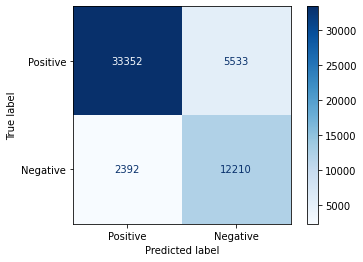

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


labels = ["Positive", "Negative"]

cm = confusion_matrix(y_true[0,:,:], y_pred[0,:,:])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

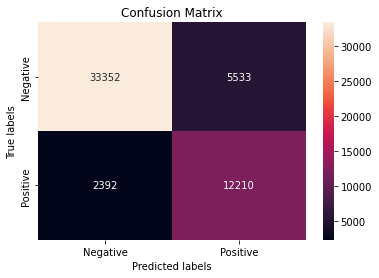

In [ ]:
cf_matrix = confusion_matrix(y_true[0,:,:], y_pred[0,:,:]).ravel().reshape((2,2))
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Positive']);

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def do_all_calcs(model,test_gen_pos,test_gen_neg, index):
      model_output1 = model.predict(test_gen_pos)
      y_pred[index,:14602,:] = np.argmax(model_output1, axis=1).reshape(14602,1)

      model_output2 = model.predict(test_gen_neg)
      y_pred[index,14602:,:] = np.argmax(model_output2, axis=1).reshape(38885,1)

      target_names = ['Positive class', 'Negative Class',]
      print(classification_report(y_true[index,:,:], y_pred[index,:,:], target_names=target_names))


      tn, fp, fn, tp = confusion_matrix(y_true[index,:,:], y_pred[index,:,:]).ravel()
      # Sensitivity, hit rate, recall, or true positive rate
      TPR = tp/(tp+fn)
      print("Sensitivity",TPR)
      # Specificity or true negative rate
      TNR = tn/(tn+fp) 
      print("Specificity",TNR)
      # Precision or positive predictive value
      PPV = tp/(tp+fp)
      print("Precision",PPV)
      recall = tp/(tp-fn)
      print("Recall",recall)
      f1  = ((PPV*recall)/(PPV+recall))
      print("F1 score", f1)

      labels = ["Positive", "Negative"]

      cm = confusion_matrix(y_true[index,:,:], y_pred[index,:,:])

      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

      disp.plot(cmap=plt.cm.Blues)
      plt.show()

                precision    recall  f1-score   support

Positive class       0.93      0.86      0.89     38885
Negative Class       0.69      0.84      0.75     14602

      accuracy                           0.85     53487
     macro avg       0.81      0.85      0.82     53487
  weighted avg       0.87      0.85      0.86     53487

Sensitivity 0.8361868237227778
Specificity 0.8577086280056577
Precision 0.6881587104773713
Recall 1.2436341413729883
F1 score 0.44301730706432996


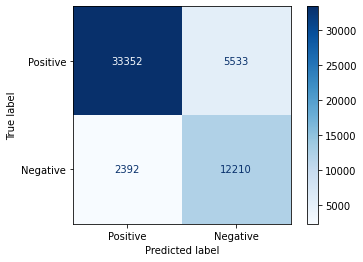

In [ ]:
do_all_calcs(model1,test_generator1_pos,test_generator1_neg, 0)

### Model 2

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1BfnRw-NAe4kbaFOuSQbVI3m3gDgp86Yv'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model2-6.h5')

In [ ]:
!mkdir /content/model2_6
!unrar x "/content/model2_6-3.rar" "/content/model2_6"


mkdir: cannot create directory ‘/content/model2_6’: File exists

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/model2_6-3.rar
No such file or directory
No files to extract


In [ ]:
model2 = keras.models.load_model('/content/model2-6.h5')


                precision    recall  f1-score   support

Positive class       0.92      0.91      0.91     38885
Negative Class       0.76      0.78      0.77     14602

      accuracy                           0.87     53487
     macro avg       0.84      0.84      0.84     53487
  weighted avg       0.87      0.87      0.87     53487

Sensitivity 0.7813313244760992
Specificity 0.9057220007715058
Precision 0.7568159203980099
Recall 1.3886319376825706
F1 score 0.48984586320896484


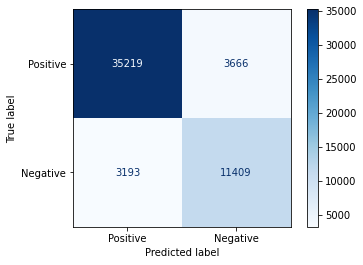

In [ ]:
do_all_calcs(model2,test_generator_n17_pos,test_generator_n17_neg, 1)

### Model 3

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1rtzs76WkB2YXSBy5JFB4ziKD8USHI3FL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model3-7.h5')

In [ ]:
model3 = keras.models.load_model('/content/model3-7.h5')


                precision    recall  f1-score   support

Positive class       0.91      0.91      0.91     38885
Negative Class       0.75      0.76      0.76     14602

      accuracy                           0.87     53487
     macro avg       0.83      0.83      0.83     53487
  weighted avg       0.87      0.87      0.87     53487

Sensitivity 0.761128612518833
Specificity 0.9054391153401055
Precision 0.7514028801298087
Recall 1.4573826383425124
F1 score 0.49578444930186916


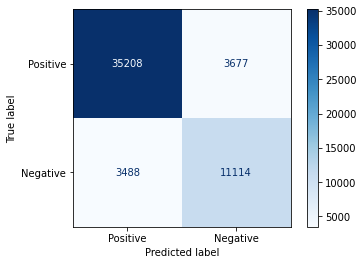

In [ ]:
do_all_calcs(model3,test_generator_n17_pos,test_generator_n17_neg, 2)

### Model 4

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1T-xfVRfdDIYez0b5KHtcya9wJN7PJtoi'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model4-8.h5')

In [ ]:
model4 = keras.models.load_model('/content/model4-8.h5')


                precision    recall  f1-score   support

Positive class       0.91      0.91      0.91     38885
Negative Class       0.76      0.75      0.76     14602

      accuracy                           0.87     53487
     macro avg       0.83      0.83      0.83     53487
  weighted avg       0.87      0.87      0.87     53487

Sensitivity 0.7507875633474866
Specificity 0.9109425228237109
Precision 0.759947317343685
Recall 1.4968596395412344
F1 score 0.5040459770114942


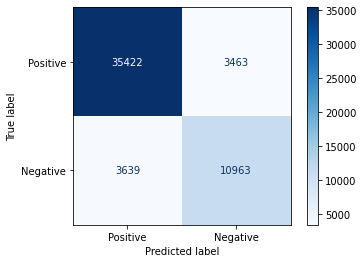

In [ ]:
do_all_calcs(model4,test_generator_n17_pos,test_generator_n17_neg, 3)

### Model 5

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1z0csTQB6DPLom5plWXF4vwTtbLCdzvjS'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model5-9.h5')

In [ ]:
model5 = keras.models.load_model('/content/model5-9.h5')


                precision    recall  f1-score   support

Positive class       0.92      0.89      0.91     38885
Negative Class       0.73      0.79      0.76     14602

      accuracy                           0.86     53487
     macro avg       0.83      0.84      0.83     53487
  weighted avg       0.87      0.86      0.87     53487

Sensitivity 0.7890699904122723
Specificity 0.8923749517808923
Precision 0.7335582861144713
Recall 1.364842454394693
F1 score 0.477121205847033


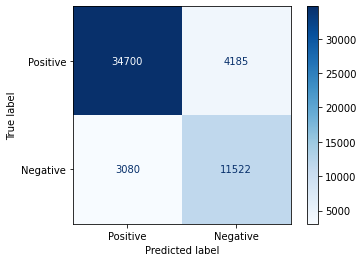

In [ ]:
do_all_calcs(model5,test_generator_n17_pos,test_generator_n17_neg, 4)

### Model 6

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1IwNhAqyDnS9LbVOQroAyEXdbA2GOwO_M'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model6-10.h5')

In [ ]:
model6 = keras.models.load_model('/content/model6-10.h5')


                precision    recall  f1-score   support

Positive class       0.90      0.91      0.90     38885
Negative Class       0.75      0.72      0.74     14602

      accuracy                           0.86     53487
     macro avg       0.83      0.82      0.82     53487
  weighted avg       0.86      0.86      0.86     53487

Sensitivity 0.723120120531434
Specificity 0.9115340105439116
Precision 0.7542681620115722
Recall 1.6204726826273788
F1 score 0.5146965634901292


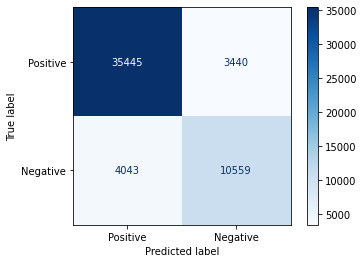

In [ ]:
do_all_calcs(model6,test_generator_n17_pos,test_generator_n17_neg, 5)

### Model 7

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1rBWVX9eHeojPJN7qS6aph_qbHBjRAfbz'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model7-11.h5')

In [ ]:
model7 = keras.models.load_model('/content/model7-11.h5')


                precision    recall  f1-score   support

Positive class       0.74      1.00      0.85     38885
Negative Class       0.85      0.05      0.09     14602

      accuracy                           0.74     53487
     macro avg       0.79      0.52      0.47     53487
  weighted avg       0.77      0.74      0.64     53487

Sensitivity 0.0463635118476921
Specificity 0.996991127684197
Precision 0.8526448362720404
Recall -0.051102053140096616
F1 score -0.05436004496547294


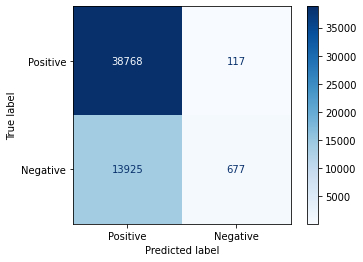

In [ ]:
do_all_calcs(model7,test_generator_7_pos,test_generator_7_neg, 6)

### Model 8

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1A7gMSue-zJw6biiZA5wVXG-VOLz3kkiE'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model8-15.h5')

In [ ]:
model8 = keras.models.load_model('/content/model8-15.h5')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: Ru

                precision    recall  f1-score   support

Positive class       0.73      1.00      0.84     38885
Negative Class       0.00      0.00      0.00     14602

      accuracy                           0.73     53487
     macro avg       0.36      0.50      0.42     53487
  weighted avg       0.53      0.73      0.61     53487

Sensitivity 0.0
Specificity 1.0
Precision nan
Recall -0.0
F1 score nan


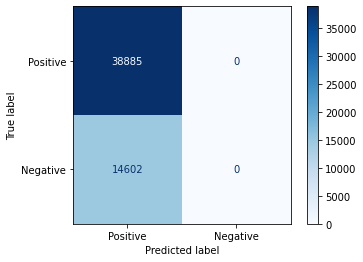

In [ ]:
do_all_calcs(model7,test_generator_8_pos,test_generator_8_neg, 7)

# SVM on model 1

In [ ]:
len(model2.layers)

181

In [ ]:
from keras.applications.efficientnet_v2 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [ ]:
POS_TRAIN_DIR = os.path.join(TRAIN_DIR, "pos")
train_poss = os.listdir(POS_TRAIN_DIR)
sample_train_pos = train_poss[:5]
sample_train_pos = [str(POS_TRAIN_DIR+"/" + x) for x in sample_train_pos]
sample_train_pos

['/content/IDC_files/content/IDC_patients/train/pos/12810_idx5_x1651_y1251_class1.png',
 '/content/IDC_files/content/IDC_patients/train/pos/9077_idx5_x1801_y1651_class1.png',
 '/content/IDC_files/content/IDC_patients/train/pos/8867_idx5_x1051_y951_class1.png',
 '/content/IDC_files/content/IDC_patients/train/pos/12818_idx5_x2351_y1651_class1.png',
 '/content/IDC_files/content/IDC_patients/train/pos/14211_idx5_x1401_y1101_class1.png']

In [ ]:
model_svm = Model(inputs=model2.inputs, outputs=model2.layers[176].output)
# load and preprocess the image 
img = load_img(sample_train_pos[0], target_size=(50, 50))  
x = img_to_array(img)  
x = np.expand_dims(x, axis=0)  
x = preprocess_input(x) 
 
# extract features  
features = model_svm.predict(x) 
features.shape

NameError: ignored

In [ ]:
x_train_svm = np.zeros((171131,256))
y_train_svm = np.zeros((171131,))
y_train_svm_pred = np.zeros((171131,))


In [ ]:
y_train_svm[ :49174] = 1  

In [ ]:
x_test_svm = np.zeros((53487,256))
y_test_svm = np.zeros((53487,))
y_test_svm_pred = np.zeros((53487,))

In [ ]:
y_test_svm[ :14602] = 1  

In [ ]:
model_svm_output1 = model_svm.predict(train_generator_n19_pos)
x_train_svm[:49174,:] = model_svm_output1

model_svm_output2 = model_svm.predict(train_generator_n19_neg)
x_train_svm[49174:,:] = model_svm_output2

In [ ]:
model_svm_output1 = model_svm.predict(test_generator_n17_pos)
x_test_svm[:14602,:] = model_svm_output1

In [ ]:
model_svm_output2 = model_svm.predict(test_generator_n17_neg)
x_test_svm[14602:,:] = model_svm_output2

In [ ]:
model_svm_output2[14606]

array([-1.       , -1.       , -1.       , -1.       ,  1.       ,
        1.       , -1.       ,  1.       , -1.       ,  1.       ,
       -1.       , -1.       ,  1.       ,  1.       ,  1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
        1.       ,  1.       ,  1.       ,  1.       ,  1.       ,
       -1.       ,  1.       , -1.       ,  1.       ,  1.       ,
        1.       ,  1.       , -1.       , -1.       , -1.       ,
       -1.       ,  1.       ,  1.       ,  1.       , -1.       ,
       -1.       ,  1.       , -1.       , -1.       , -1.       ,
       -1.       ,  1.       , -1.       ,  1.       ,  1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
        1.       , -1.       ,  1.       ,  1.       , -1.       ,
       -1.       , -1.       ,  1.       , -1.       ,  1.       ,
       -1.       ,  1.       ,  1.       ,  1.       ,  1.    

In [ ]:
x_test_svm[14606]

array([-1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1

In [ ]:
model_svm_output1.shape

(14602, 256)

In [ ]:
from sklearn import svm
clf_svc = svm.SVC()
clf_svc.fit(x_train_svm, y_train_svm)

SVC()

In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(clf_svc, open(filename, 'wb'))



In [ ]:
import pickle
filename = 'finalized_model.sav'

model_svm_loaded = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_svm_pred = model_svm_loaded.predict(x_test_svm)
#y_test_svm_pred[ 14602:] = model_svm_loaded.predict(x_test_svm[14602:,:])

In [ ]:
y_test_svm_pred[0]

1.0

In [ ]:
y_test_svm_pred.sum()

12868.0